In [2]:
# Cell 1: Load Outlier Information  
import numpy as np  
import matplotlib.pyplot as plt  
from PIL import Image  
import os  

OUTPUT_DIR = r"D:\data mining\appendix"  
DATA_PATH = r"D:\data\data original"  

log_likelihood = np.load(f'{OUTPUT_DIR}/log_likelihood.npy')  
true_labels = np.load(f'{OUTPUT_DIR}/true_labels.npy')  
umap_embeddings = np.load(f'{OUTPUT_DIR}/umap_embeddings.npy')  

threshold = np.percentile(log_likelihood, 5)  
outliers = log_likelihood < threshold  

outlier_indices = np.where(outliers)[0]  

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']  

print(f"Total outliers: {len(outlier_indices)}")  

Total outliers: 127


In [4]:

# Cell 2: Get Image Paths  
from torchvision import datasets  

dataset = datasets.ImageFolder(root=DATA_PATH)  
image_paths = [path for path, _ in dataset.samples]  

outlier_paths = [image_paths[i] for i in outlier_indices[:10]]  
outlier_labels = [true_labels[i] for i in outlier_indices[:10]]  
outlier_scores = [log_likelihood[i] for i in outlier_indices[:10]]  

print("Top 10 outliers:")  
for i, (path, label, score) in enumerate(zip(outlier_paths, outlier_labels, outlier_scores)):  
    print(f"  {i+1}. {class_names[label]}: {score:.2f}")


Top 10 outliers:
  1. cardboard: 226.45
  2. cardboard: 226.45
  3. cardboard: 226.47
  4. cardboard: 226.46
  5. cardboard: 226.46
  6. cardboard: 226.46
  7. cardboard: 226.46
  8. cardboard: 226.45
  9. cardboard: 226.46
  10. cardboard: 226.46


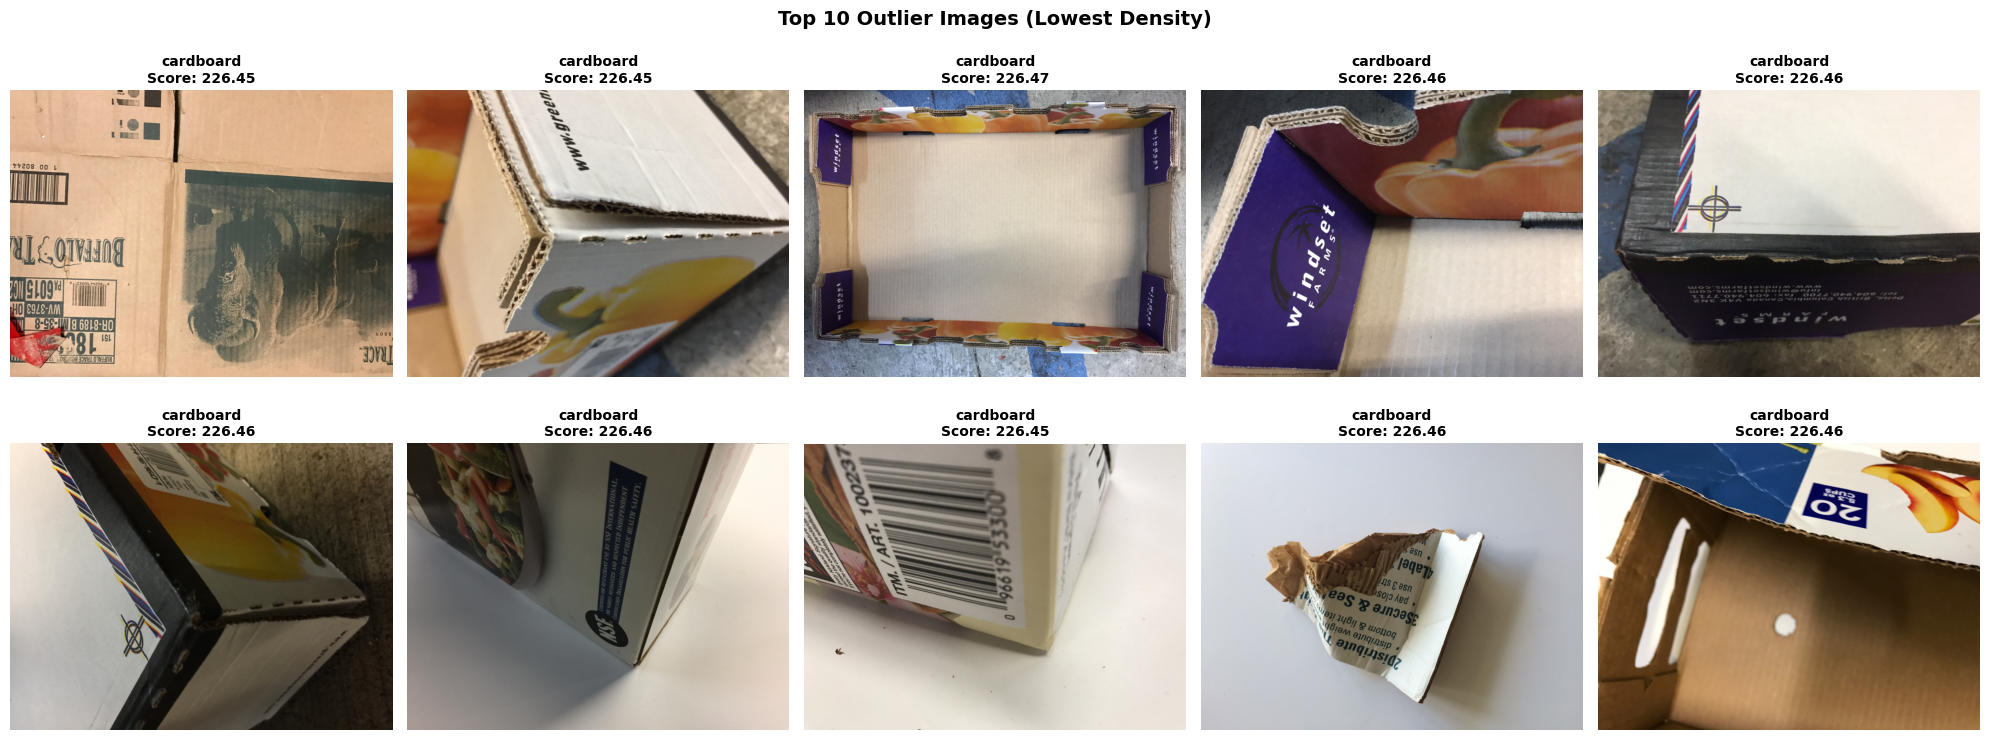

In [5]:

# Cell 3: Visualize Top Outliers  
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  
axes = axes.flatten()  

for idx, (path, label, score) in enumerate(zip(outlier_paths, outlier_labels, outlier_scores)):  
    img = Image.open(path)  
    axes[idx].imshow(img)  
    axes[idx].set_title(f'{class_names[label]}\nScore: {score:.2f}',   
                       fontsize=10, fontweight='bold')  
    axes[idx].axis('off')  

plt.suptitle('Top 10 Outlier Images (Lowest Density)', fontsize=14, fontweight='bold')  
plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/07_outlier_examples.png', dpi=300, bbox_inches='tight')  
plt.show()  


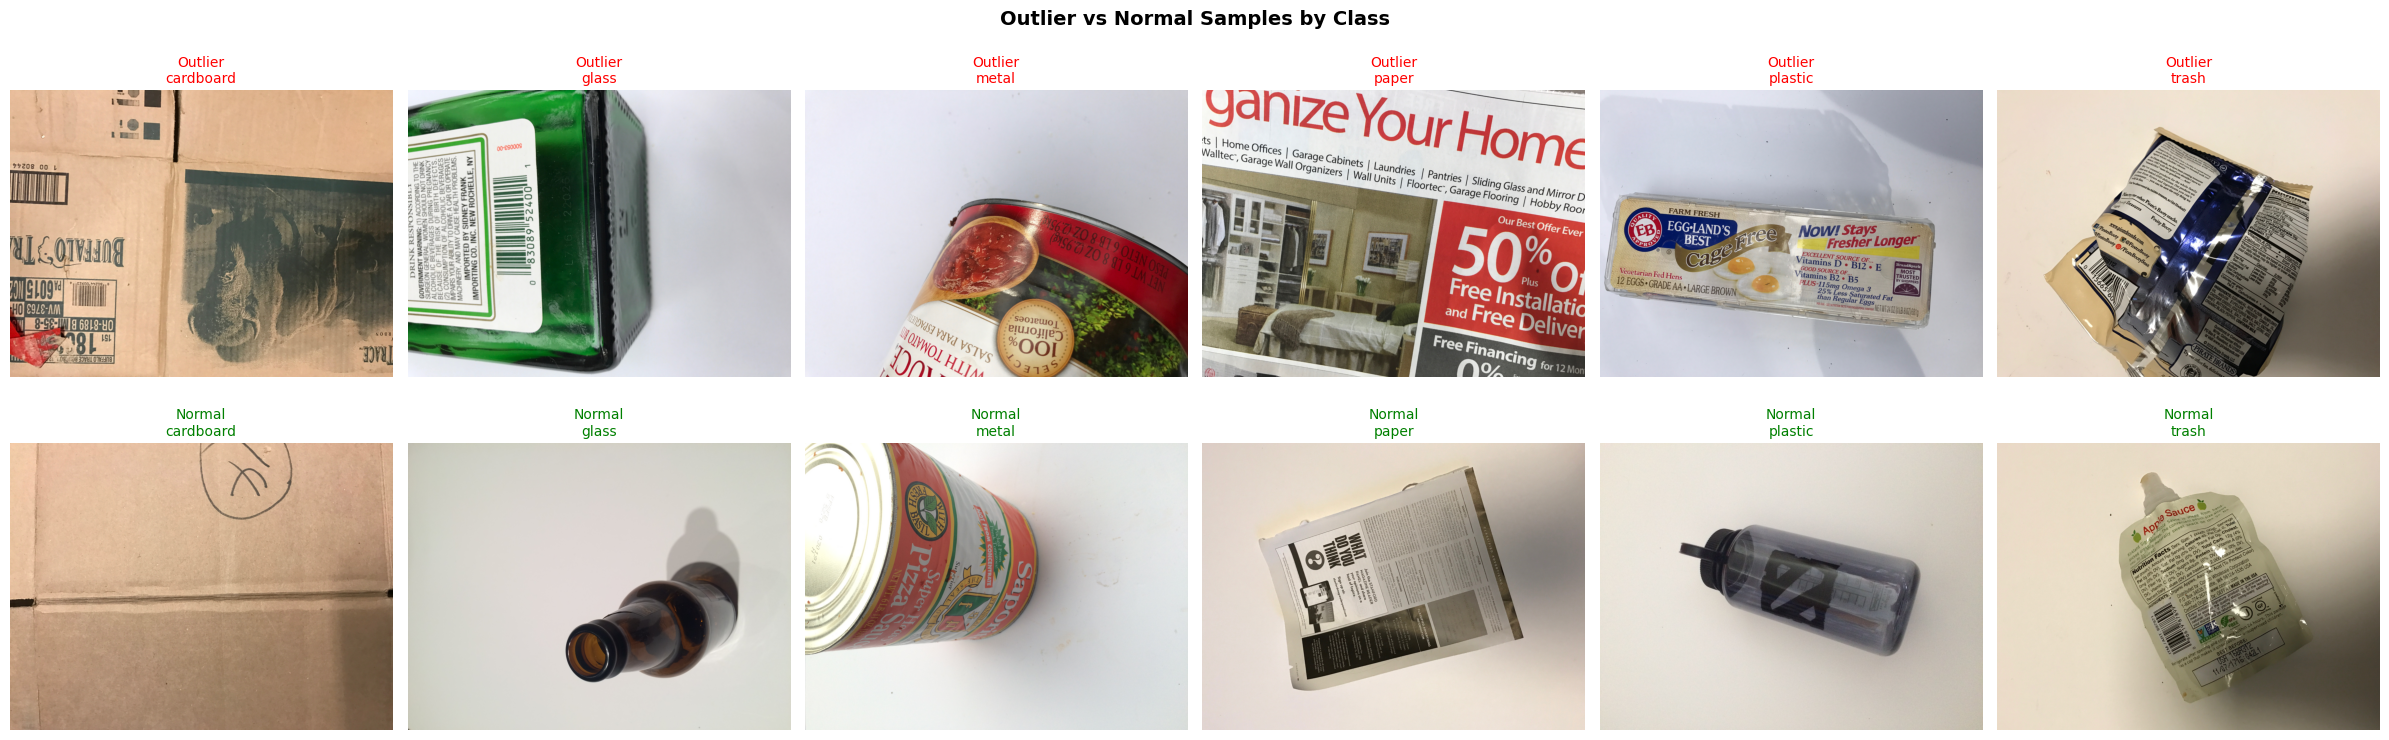

In [6]:

# Cell 4: Compare Normal vs Outlier Samples  
normal_indices = np.where(~outliers)[0]  

fig, axes = plt.subplots(2, 6, figsize=(24, 8))  

for i in range(6):  
    class_mask = true_labels == i  
    class_outlier_idx = outlier_indices[true_labels[outlier_indices] == i]  
    class_normal_idx = normal_indices[true_labels[normal_indices] == i]  
    
    if len(class_outlier_idx) > 0:  
        outlier_img = Image.open(image_paths[class_outlier_idx[0]])  
        axes[0, i].imshow(outlier_img)  
        axes[0, i].set_title(f'Outlier\n{class_names[i]}', fontsize=10, color='red')  
        axes[0, i].axis('off')  
    
    if len(class_normal_idx) > 0:  
        normal_img = Image.open(image_paths[class_normal_idx[0]])  
        axes[1, i].imshow(normal_img)  
        axes[1, i].set_title(f'Normal\n{class_names[i]}', fontsize=10, color='green')  
        axes[1, i].axis('off')  

plt.suptitle('Outlier vs Normal Samples by Class', fontsize=14, fontweight='bold')  
plt.tight_layout()  
plt.savefig(f'{OUTPUT_DIR}/07_outlier_comparison.png', dpi=300, bbox_inches='tight')  
plt.show()  
